<a href="https://colab.research.google.com/github/GunH-colab/basicsML/blob/master/Regression/californiahousingcsv_keras(Sequential)_NeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


*   **California Housing Dataset**
*   **Sequential API**
*   **Early Stopping and L2 regularization**
*   **Standarized using MinMaxScaler**
*   **Heatmaps and histplots of dataset included**

In [1]:
#importing all the necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# you need to upload the californiahousing.csv on Colab first. df is the DataFrame.
# The corresponding csv file can be found in the folder of this ipynb

df = pd.read_csv('californiahousing.csv') 

In [3]:
# take your input for n for the number of rows you want to view

n = int(input())

df.head(n) # viewing the first n rows

10


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [4]:
df.info() # dataset information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
df.isnull().sum() # viewing the sum of missing values of each features in the datasets

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [6]:
df.dropna(inplace=True) # to overwrite the existing dataframe
df_new = df.drop('ocean_proximity', axis=1) # dropping the column 'ocean_proximity' and columns with any missing values
df_new.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

In [7]:
df_new.isnull().sum() # rechecking(there is no missing value)

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

In [8]:
df_new.describe() # viewing the 'stats' of the dataset

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


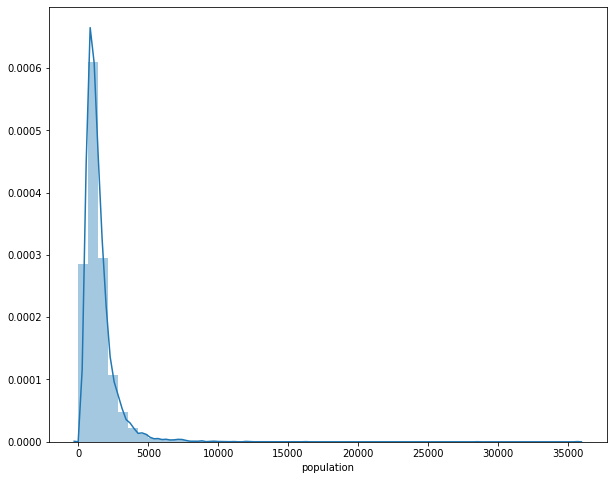

In [9]:
LABEL = "population" # you can try using any other label too, such as longitude/latitude

plt.figure(figsize=(10, 8))
sns.distplot(df_new[LABEL])

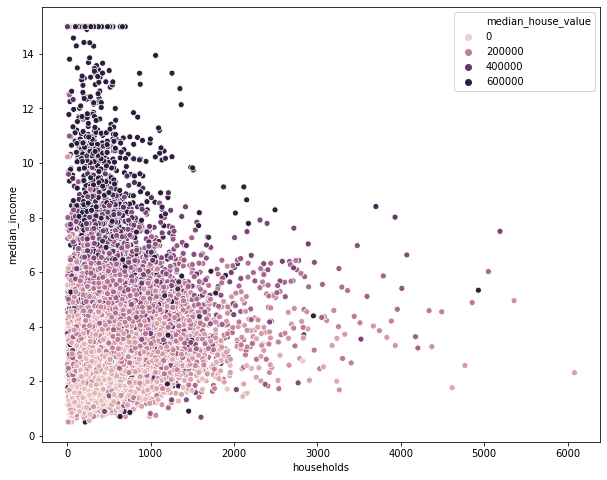

In [10]:
X, Y = "households", "median_income" # you can try labels of your choice too for X and Y

plt.figure(figsize=(10, 8))
sns.scatterplot(X, Y, markers='.', data=df, hue='median_house_value')

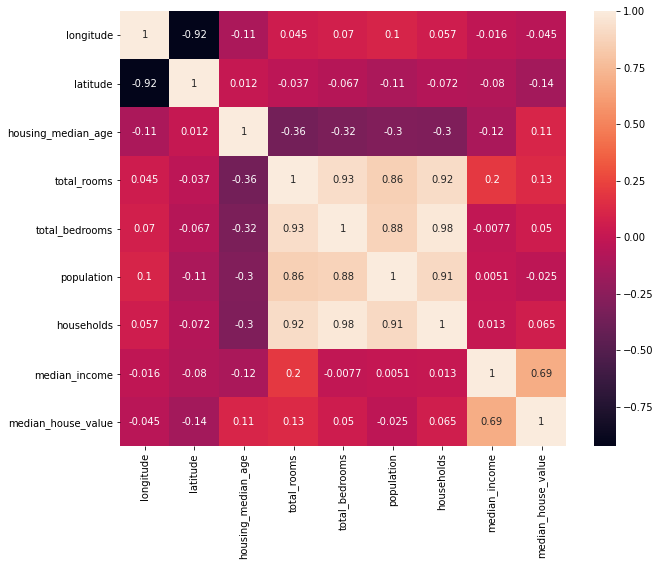

In [11]:
# for establishing pairwise correlation between any two labels( **df.corr() does it**)

plt.figure(figsize=(10, 8))
sns.heatmap(df_new.corr(), annot=True)


In [12]:
dataset = df_new.values # taking only the values

data = dataset[:, 0:8] # features
targets = dataset[:, 8] # prices

mms = MinMaxScaler()
data_mms = mms.fit_transform(data) 

train_data, test_data, train_targets, test_targets = train_test_split(data_mms, targets, test_size=0.2)

In [13]:
# The Model

model = keras.models.Sequential([
        keras.layers.Dense(16, activation="relu", input_shape=(8, ), kernel_regularizer=keras.regularizers.l2(0.001)),
        keras.layers.Dense(8, activation="relu", kernel_regularizer=keras.regularizers.l2(0.001)),
        keras.layers.Dense(1, activation="relu", kernel_regularizer=keras.regularizers.l2(0.001))
])

In [14]:
# compliling the model

model.compile(loss="mse", optimizer="rmsprop", metrics=["mape"])

ES = keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)


In [15]:
# training

history = model.fit(train_data, train_targets, validation_split=0.2, epochs=500, callbacks=[ES])

Epoch 1/500
409/409 [==============================] - 1s 2ms/step - loss: 56086257664.0000 - mape: 99.9967 - val_loss: 55387086848.0000 - val_mape: 99.9898
Epoch 2/500
409/409 [==============================] - 1s 1ms/step - loss: 56071114752.0000 - mape: 99.9728 - val_loss: 55360860160.0000 - val_mape: 99.9475
Epoch 3/500
409/409 [==============================] - 1s 1ms/step - loss: 56026136576.0000 - mape: 99.9027 - val_loss: 55294197760.0000 - val_mape: 99.8401
Epoch 4/500
409/409 [==============================] - 1s 1ms/step - loss: 55923122176.0000 - mape: 99.7417 - val_loss: 55151030272.0000 - val_mape: 99.6096
Epoch 5/500
409/409 [==============================] - 1s 1ms/step - loss: 55720697856.0000 - mape: 99.4242 - val_loss: 54886703104.0000 - val_mape: 99.1832
Epoch 6/500
409/409 [==============================] - 1s 1ms/step - loss: 55373967360.0000 - mape: 98.8797 - val_loss: 54461829120.0000 - val_mape: 98.4952
Epoch 7/500
409/409 [==============================] - 1s 

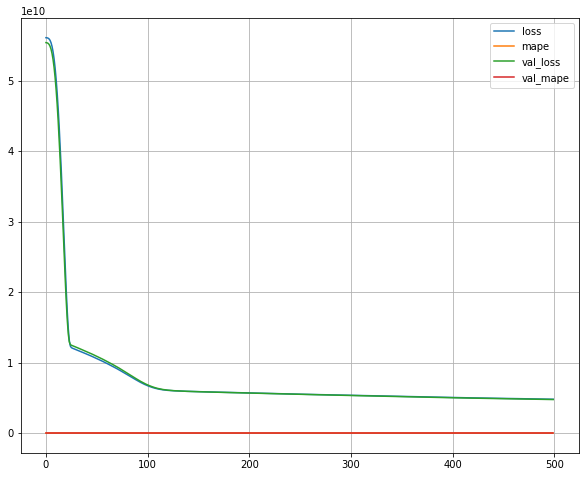

In [16]:
# model performance

import pandas as pd
pd.DataFrame(history.history).plot(figsize=(10, 8))
plt.grid(True)
plt.gca()

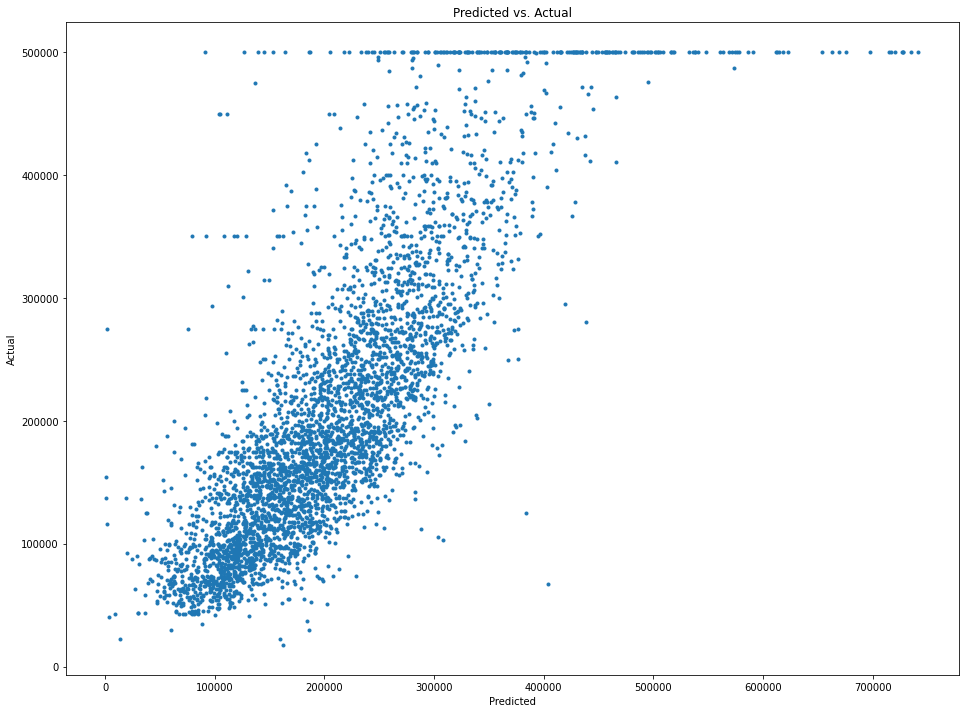

In [17]:
# recording the predictions

preds = model.predict(test_data)

plt.figure(figsize=(16, 12))
plt.scatter(x=preds, y=test_targets, marker='.')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Predicted vs. Actual")
plt.show()

In [18]:
print(preds[:10],"\n\nPredictions\n\n", test_targets[:10], "\n\nActual")

[[135744.67 ]
 [251191.69 ]
 [118362.516]
 [200005.33 ]
 [260924.73 ]
 [215947.58 ]
 [126626.08 ]
 [296690.25 ]
 [162305.4  ]
 [257229.28 ]] 

Predictions

 [116800. 357000.  75000. 146800. 242900. 158800. 500000. 319400. 198500.
 294400.] 

Actual
